# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [52]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.exponnorm
exponnorm_rv = sts.exponnorm(1.5)
sample = exponnorm_rv.rvs(100)
sample

array([ 3.06938025,  1.91715221, -0.40922646, -1.08464714,  1.30671588,
        0.02651781,  1.16149032,  0.67991503,  0.25185637,  3.28274097,
        0.98602937,  2.26242699,  1.25559371,  0.22924831,  2.25523474,
        3.97462281,  1.04135608,  1.00841193,  0.01984819,  0.22628705,
       -0.43919429,  1.68576671,  0.18935293, -0.86962667,  0.4086135 ,
        2.11314496,  3.19012893,  0.63576355,  1.15373599,  1.42524708,
        1.42889133,  3.67133161,  0.20230573, -0.42649258, -1.46732158,
        2.41718228, -0.42318144, -0.22561124,  0.25632921,  2.66566   ,
       -0.44473379,  3.19998194,  2.88571652,  0.66981909,  0.46237135,
        0.96195217, -1.37780042,  0.02643797, -0.17958768,  7.65060124,
        2.02881086, -0.0191165 , -1.54668159,  2.64927138,  5.06883434,
        3.13724022,  2.51505173, -1.85792079,  7.79896731,  6.43805661,
        1.79695515,  0.53035712,  0.2562789 , -0.56065706,  0.62325968,
        1.84342915, -0.2943911 ,  2.52630007,  1.8556818 ,  2.30

In [53]:
sample.dtype

dtype('float64')

In [54]:
real_mean = exponnorm_rv.mean() # настоящее среднее случайной величины
real_mean

1.5

In [55]:
real_var = exponnorm_rv.var() # настоящая дисперсия случайной величины
real_var

3.25

### Постройте гистограмму выборки и теоретическую плотность распределения

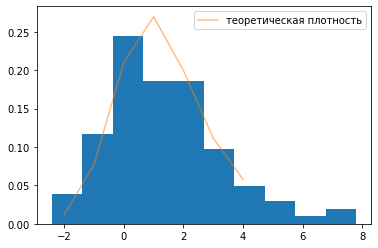

In [56]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-2,4,7)
pdf = exponnorm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [57]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.4146344704574856
3.788431047842502


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

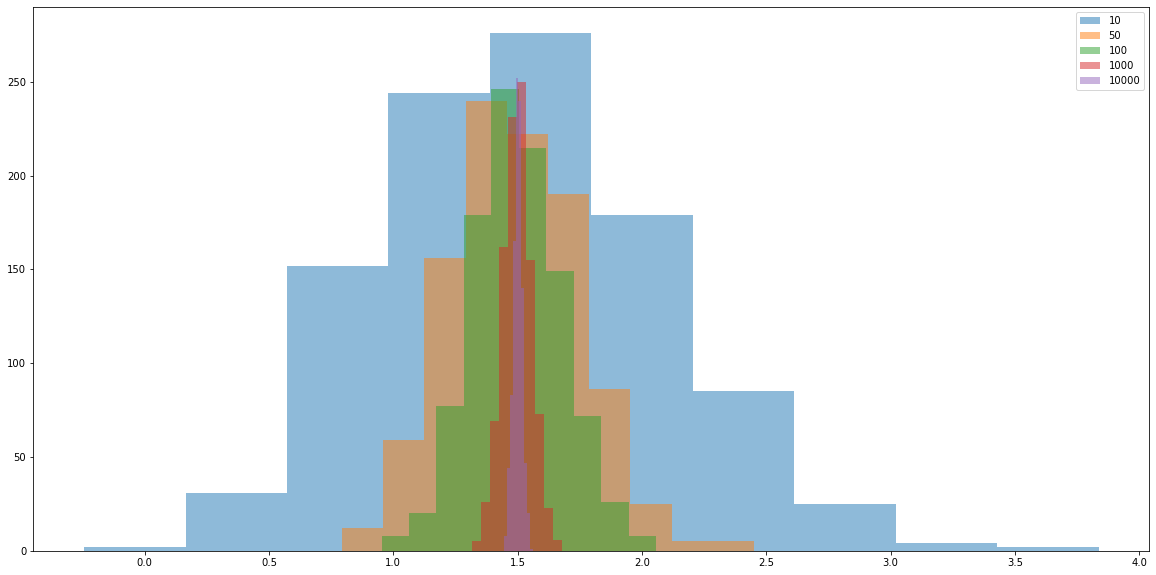

In [58]:
# ваш код тут
plt.figure(figsize=(20,10))
for n in [10, 50, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(exponnorm_rv.rvs(n)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '50', '100', '1000', '10000'])
plt.show()

[]

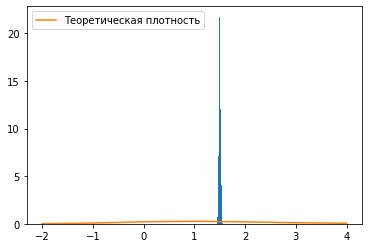

In [59]:
norm = sts.norm(loc=exponnorm_rv.mean(), scale=exponnorm_rv.std() / np.sqrt(n))
plt.hist(means, density=True, bins=10)
x = np.linspace(-2, 4, 7)
pdf = exponnorm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=1)
plt.legend()
plt.plot()


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?

Среднее не попадает в доверительный интервал, следовательно апроксимация распределения выборочного среднего работает плохо.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [22]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [23]:
data = df[['total day calls', 'churn']]
data

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [24]:
data_true = data[data["churn"] == True]
len_true = len(data_true)
data_true.sort_values(by='total day calls')

,total day calls,churn
1345,0,True
1322,42,True
2884,44,True
2964,44,True
1346,45,True
...,...,...
1018,148,True
3190,151,True
580,151,True
1869,156,True


In [25]:
data_false = data[data["churn"] == False]
len_false = len(data_false)
data_false.sort_values(by='total day calls')

,total day calls,churn
1397,0,False
1144,30,False
1989,35,False
692,36,False
3187,40,False
...,...,...
315,158,False
2392,158,False
1057,158,False
1460,160,False


In [26]:
#среднее
def means(data):
    return data['total day calls'].mean()
mean_true = means(data_true)
mean_false = means(data_false)

In [27]:
#cтандартное отклонение
def std(data):
    return data['total day calls'].std(ddof=1)
std_true = std(data_true)
std_false = std(data_false)



In [28]:
#дисперсия
def var(data):
    return data['total day calls'].var(ddof=1)
var_true = var(data_true)
var_false = var(data_false)

In [43]:
#доверительный интервал для z интервала
def z_interval(alpha, mean, std, len):
    return [mean - (norm.ppf(1-alpha/2))*(std/len**0.5), mean + (norm.ppf(1-alpha/2))*(std/len**0.5)]


In [44]:
z_interval(0.04, mean_true, std_true, len_true)

[99.82600113708524, 102.84480631633092]

In [45]:
z_interval(0.04, mean_false, std_false, len_false)

[99.71306067622335, 100.85325511325034]

In [46]:
#доверительный интервал для функции
from statsmodels.stats.weightstats import _zconfint_generic
def zconfint_interval(mean_data, var_data, len_data, alpha):
    return _zconfint_generic(mean_data, (var_data/len_data)**(1/2), (1-alpha), alternative='two-sided')

In [48]:
zconfint_interval(mean_true, var_true, len_true, 0.96)


(99.31856277566735, 103.35224467774881)

In [50]:
zconfint_interval(mean_false, var_false, len_false, 0.96)


(99.52140259878247, 101.04491319069122)

Вывод: результаты по доверительному интервалу практически не отличаются между клиентами, которые остались и ушли.
Так же видно, что доверительный интервал через функцию более точный, чем через формулу z.